# Data Cleaning Notebook for Combined PUF File

DeSYNPuf Exploration & Cleanup

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.rcsetup as mrc

# Library that supplies Elixhauser scores based on codes
from hcuppy.elixhauser import ElixhauserEngine


This file is 1/3 of a GB in size.

In [2]:
desynpuf = pd.read_csv("/home/kylier/python/DS/data/PUF/IPANDOP_FIPS_ALL.csv")

/home/kylier/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (59,69,71,72,74,75,95,96,98,102,104,115) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Drop the first 2 columns (created when the csv file was written out)

Show nulls

In [3]:
desynpuf.drop(columns=desynpuf.columns[0], axis=1, inplace=True)
desynpuf.drop(columns=desynpuf.columns[0], axis=1, inplace=True)
desynpuf.isnull().sum() 

DESYNPUF_ID               0
BENE_BIRTH_DT             0
BENE_DEATH_DT        981851
BENE_SEX_IDENT_CD         0
BENE_RACE_CD              0
                      ...  
HCPCS_CD_44          981241
HCPCS_CD_45          991604
CLAIM_TYPE           149316
BENE_AGE             149316
YEAR                      0
Length: 122, dtype: int64

Almost 1 million rows

In [4]:
desynpuf.shape

(991604, 122)

In [5]:
for c in desynpuf.columns:
    print(c)

DESYNPUF_ID
BENE_BIRTH_DT
BENE_DEATH_DT
BENE_SEX_IDENT_CD
BENE_RACE_CD
BENE_ESRD_IND
SP_STATE_CODE
BENE_COUNTY_CD
BENE_HI_CVRAGE_TOT_MONS
BENE_SMI_CVRAGE_TOT_MONS
BENE_HMO_CVRAGE_TOT_MONS
PLAN_CVRG_MOS_NUM
SP_ALZHDMTA
SP_CHF
SP_CHRNKIDN
SP_CNCR
SP_COPD
SP_DEPRESSN
SP_DIABETES
SP_ISCHMCHT
SP_OSTEOPRS
SP_RA_OA
SP_STRKETIA
MEDREIMB_IP
BENRES_IP
PPPYMT_IP
MEDREIMB_OP
BENRES_OP
PPPYMT_OP
MEDREIMB_CAR
BENRES_CAR
PPPYMT_CAR
FIPS_COUNTY_CODE
FULL_FIPS_CODE
CBSA
CBSA_NAME
FIPS_STATE_CODE
CLM_ID
SEGMENT
CLM_FROM_DT
CLM_THRU_DT
PRVDR_NUM
CLM_PMT_AMT
NCH_PRMRY_PYR_CLM_PD_AMT
AT_PHYSN_NPI
OP_PHYSN_NPI
OT_PHYSN_NPI
CLM_ADMSN_DT
ADMTNG_ICD9_DGNS_CD
CLM_PASS_THRU_PER_DIEM_AMT
NCH_BENE_IP_DDCTBL_AMT
NCH_BENE_PTB_DDCTBL_AMT
NCH_BENE_PTA_COINSRNC_LBLTY_AM
NCH_BENE_PTB_COINSRNC_AMT
NCH_BENE_BLOOD_DDCTBL_LBLTY_AM
CLM_UTLZTN_DAY_CNT
NCH_BENE_DSCHRG_DT
CLM_DRG_CD
ICD9_DGNS_CD_1
ICD9_DGNS_CD_2
ICD9_DGNS_CD_3
ICD9_DGNS_CD_4
ICD9_DGNS_CD_5
ICD9_DGNS_CD_6
ICD9_DGNS_CD_7
ICD9_DGNS_CD_8
ICD9_DGNS_CD_9
ICD9_DGNS_CD

## Age

This data is slightly more normally-distributed.  The mean age is 73, the median age is 74. IQR is 15, making anyone under 67 years old in the <25th percentile.  

Not surprising - these are Medicare beneficiaries.  Only those who are disabled are eligible at <65 years.

<AxesSubplot:xlabel='BENE_AGE', ylabel='Count'>

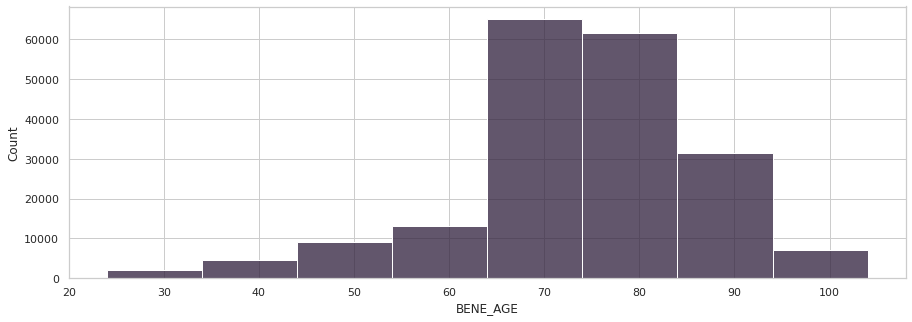

In [6]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="mako")
sb.histplot(x=round(desynpuf.groupby(["DESYNPUF_ID","YEAR"])["BENE_AGE"].mean()), binwidth=10)

In [7]:
desynpuf.groupby(["DESYNPUF_ID","YEAR"])["BENE_AGE"].mean().describe()

count    194068.000000
mean         73.159626
std          12.768693
min          24.000000
25%          67.666667
50%          74.000000
75%          81.625000
max         102.000000
Name: BENE_AGE, dtype: float64

## Race Codes

NaN	UNKNOWN

1	NON-HISPANIC WHITE

2	BLACK (OR AFRICAN-AMERICAN)

3	OTHER

4	ASIAN/PACIFIC ISLANDER

5	HISPANIC

6	AMERICAN INDIAN / ALASKA NATIVE

<AxesSubplot:xlabel='BENE_RACE_CD', ylabel='count'>

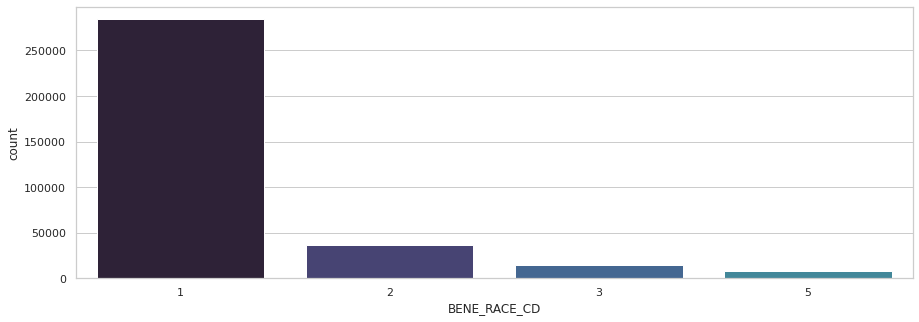

In [8]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(x=round(desynpuf.groupby(["DESYNPUF_ID","YEAR"])["BENE_RACE_CD"].mean()))

For this data set, the beneficiary population is 84% white, 11% Black or African American, 2.3% Hispanic, and 4% Other.  

Asians / Pacific Islanders and American Indians / AK Natives are not represented.

In [9]:
desynpuf.groupby(["DESYNPUF_ID","YEAR"])["BENE_RACE_CD"].mean().value_counts(normalize=True)

1    0.826797
2    0.107737
3    0.042233
5    0.023233
Name: BENE_RACE_CD, dtype: float64

## Sex

1 MALE, 2 FEMALE recoded to 1 MALE, 0 FEMALE

<AxesSubplot:xlabel='B_SEX', ylabel='count'>

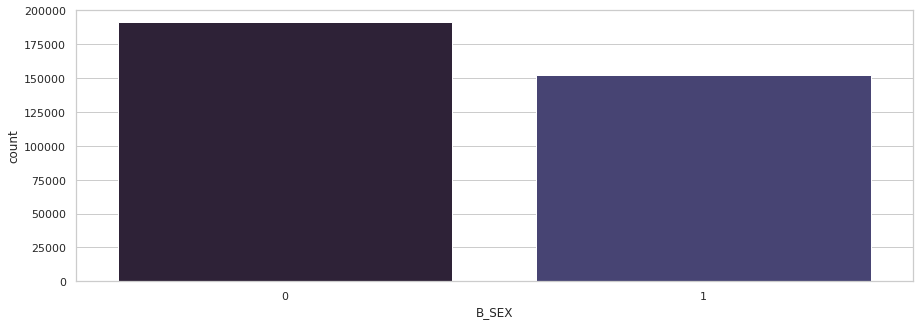

In [10]:
desynpuf["B_SEX"] = desynpuf["BENE_SEX_IDENT_CD"].replace(2, 0)

sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(x=desynpuf.groupby(["DESYNPUF_ID","YEAR"])["B_SEX"].mean())

In [11]:
desynpuf.groupby(["DESYNPUF_ID","YEAR"])["B_SEX"].mean().value_counts(normalize=True)

0    0.556415
1    0.443585
Name: B_SEX, dtype: float64

## Chronic Conditions

Alzheimer's & Related SP_ALZHDMTA 1=Yes, 2=No

Congestive Heart Failure SP_CHF 1=Yes, 2=No

Cancer SP_CNCR 1=Yes, 2=No

Depression SP_DEPRESSN 1=Yes, 2=No

Diabetes SP_DIABETES 1=Yes, 2=No

Ischemic Heart Disease SP_ISCHMCHT 1=Yes, 2=No

Osteoporosis SP_OSTEOPRS 1=Yes, 2=No

COPD SP_COPD 1=Yes, 2=No

Chronic Kidney Disease SP_CHRNKIDN 1=Yes, 2=No

Rheumatoid or Osteoarthritis SP_RA_OA 1=Yes, 2=No

Stroke or TIA SP_STRKETIA 1=Yes, 2=No

ESRD Y=Yes, 0=No, recoded to 1=Yes, 2=No

In [12]:
desynpuf["SP_ESRD"] = desynpuf["BENE_ESRD_IND"].replace("Y", 1).astype(int)
desynpuf["SP_ESRD"] = desynpuf["SP_ESRD"].replace(0, 2).astype(int)
desynpuf["CLM_ADMSN_DT"] = pd.to_datetime(desynpuf["CLM_ADMSN_DT"], format="%Y%m%d")
desynpuf["NCH_BENE_DSCHRG_DT"] = pd.to_datetime(desynpuf["NCH_BENE_DSCHRG_DT"], format="%Y%m%d")

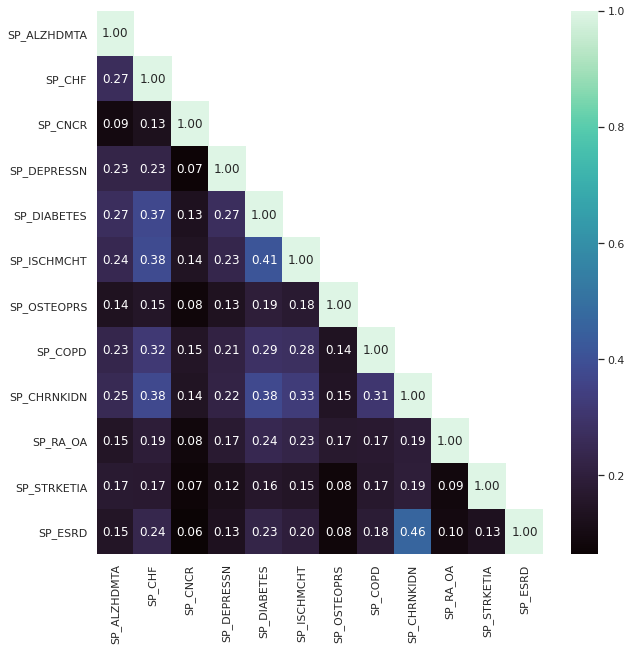

In [13]:
conditions = desynpuf[["SP_ALZHDMTA", "SP_CHF", "SP_CNCR", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", 
                        "SP_OSTEOPRS", "SP_COPD", "SP_CHRNKIDN", "SP_RA_OA", "SP_STRKETIA", "SP_ESRD"]]
conditions_corr = conditions.corr(method="pearson")
lower_corr = conditions_corr.where(np.tril(np.ones(conditions_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
conditions_hmap=sb.heatmap(lower_corr, annot=True, cmap="mako", fmt=".2f")
fig = conditions_hmap.get_figure()
fig.savefig("desynpuf_cc_heatmap.png")

Note the clinically understood correlations between diabetes, ischemic heart disease, CHF and CKD.

They are known to be causally connected on the basis of their pathophysiology.

Obviously, so are ESRD and CKD, which are two points on the same disease continuum.

There are also moderate correlations between depression, dementia, COPD and the DM/CHF/Heart Disease/CKD group.

Strangly, there appears to be a weaker correlation between stroke / TIA and these diseases.

While RA & OA produce similar disability in advanced stages, they have almost nothing in common in terms of pathophysiology or disease course.

In [14]:
# Re-code the conditions indicators as dummy variables
# "SP_ALZHDMTA", "SP_CHF", "SP_CNCR", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", SP_OSTEOPRS"
# "SP_COPD", "SP_CHRNKIDN", "SP_RA_OA" and "SP_STRKETIA"  

desynpuf["B_ALZHDMTA"] = desynpuf["SP_ALZHDMTA"].replace(2, 0).astype(int)
desynpuf["B_CHF"] = desynpuf["SP_CHF"].replace(2, 0).astype(int)
desynpuf["B_CNCR"] = desynpuf["SP_CNCR"].replace(2, 0).astype(int)
desynpuf["B_COPD"] = desynpuf["SP_COPD"].replace(2, 0).astype(int)
desynpuf["B_DEPRESSN"] = desynpuf["SP_DEPRESSN"].replace(2, 0).astype(int)
desynpuf["B_DIABETES"] = desynpuf["SP_DIABETES"].replace(2, 0).astype(int)
desynpuf["B_ISCHMCHT"] = desynpuf["SP_ISCHMCHT"].replace(2, 0).astype(int)
desynpuf["B_OSTEOPRS"] = desynpuf["SP_OSTEOPRS"].replace(2, 0).astype(int)
desynpuf["B_CHRNKIDN"] = desynpuf["SP_CHRNKIDN"].replace(2, 0).astype(int)
desynpuf["B_RA_OA"] = desynpuf["SP_RA_OA"].replace(2, 0).astype(int)
desynpuf["B_STRKETIA"] = desynpuf["SP_STRKETIA"].replace(2, 0).astype(int)
desynpuf["B_ESRD"] = desynpuf["SP_ESRD"].replace(2, 0).astype(int)


## Elixhauser Scores

NOTE: Abandoning this for now.  

Found a library that would do this with python but it only accepts **ICD10** codes.

I believe I can do this in R, but will leave that for later, if necessary.

In [15]:
#ICD9Fields = ["ADMTNG_ICD9_DGNS_CD", "ICD9_DGNS_CD_1", "ICD9_DGNS_CD_2", "ICD9_DGNS_CD_3", "ICD9_DGNS_CD_4",
#             "ICD9_DGNS_CD_5", "ICD9_DGNS_CD_6", "ICD9_DGNS_CD_7", "ICD9_DGNS_CD_8", "ICD9_DGNS_CD_9",
#             "ICD9_DGNS_CD_10"]

#for f in ICD9Fields:
#    desynpuf[f] = desynpuf[f].astype("string")
#    desynpuf[f] = desynpuf[f].str.strip()


In [16]:
#s = desynpuf["ADMTNG_ICD9_DGNS_CD"].copy()
#SeriesArray = [desynpuf["ICD9_DGNS_CD_1"], desynpuf["ICD9_DGNS_CD_2"], 
#               desynpuf["ICD9_DGNS_CD_3"], desynpuf["ICD9_DGNS_CD_4"], desynpuf["ICD9_DGNS_CD_5"], 
#               desynpuf["ICD9_DGNS_CD_6"], desynpuf["ICD9_DGNS_CD_7"], desynpuf["ICD9_DGNS_CD_8"], 
#               desynpuf["ICD9_DGNS_CD_9"], desynpuf["ICD9_DGNS_CD_10"]]

#desynpuf["ALL_ICD9_CDS"] = s.str.cat(SeriesArray, sep=",")
#codes_df = desynpuf["ALL_ICD9_CDS"][~desynpuf["ALL_ICD9_CDS"].isnull()]


In [17]:
#codesDict = {}
#for i, v in desynpuf["ALL_ICD9_CDS"].items():
#    if not pd.isna(v):
#        l = v.split(",")
#        lambda: [code.strip() for code in l]
#        codesDict[i] = l
#

## Create Summaries

For each year;
For all 3 years



In [18]:
cc_summary = desynpuf.groupby(["DESYNPUF_ID", "YEAR"]).aggregate({"BENE_AGE":"mean",
                                                                                  "B_SEX":"mean",
                                                                                  "BENE_RACE_CD":"mean",
                                                                                  "B_ALZHDMTA":"sum",
                                                                                  "B_CHF":"sum",
                                                                                  "B_CNCR":"sum",
                                                                                  "B_COPD":"sum",
                                                                                  "B_DEPRESSN":"sum",
                                                                                  "B_DIABETES":"sum",
                                                                                  "B_ISCHMCHT":"sum",
                                                                                  "B_OSTEOPRS":"sum",
                                                                                  "B_CHRNKIDN":"sum",
                                                                                  "B_RA_OA":"sum",
                                                                                  "B_STRKETIA":"sum",
                                                                                  "B_ESRD":"sum",
                                                                                  "BENE_HI_CVRAGE_TOT_MONS":"mean",
                                                                                  "BENE_SMI_CVRAGE_TOT_MONS":"mean",
                                                                                  "BENE_HMO_CVRAGE_TOT_MONS":"mean",
                                                                                  "PLAN_CVRG_MOS_NUM":"mean",
                                                                                  "CLAIM_TYPE":"count",
                                                                                  "CLM_ID":"count",
                                                                                  "PRVDR_NUM":"nunique",
                                                                                  "CLM_PMT_AMT":["sum","mean"],
                                                                                  "NCH_PRMRY_PYR_CLM_PD_AMT":"sum",
                                                                                  "AT_PHYSN_NPI":"nunique",
                                                                                  "OP_PHYSN_NPI":"nunique",
                                                                                  "OT_PHYSN_NPI":"nunique",
                                                                                  "ADMTNG_ICD9_DGNS_CD":["nunique", "count"],
                                                                                  "CLM_UTLZTN_DAY_CNT":["sum","mean","min","max"],
                                                                                  "CLM_DRG_CD":["nunique", "count"],
                                                                                  "MEDREIMB_IP":["sum","mean"],
                                                                                  "BENRES_IP":["sum","mean"],
                                                                                  "PPPYMT_IP":["sum","mean"],
                                                                                  "MEDREIMB_OP":["sum","mean"],
                                                                                  "BENRES_OP":["sum","mean"],
                                                                                  "PPPYMT_OP":["sum","mean"],
                                                                                  "CBSA":"mean",
                                                                                  "FIPS_STATE_CODE":"mean",
                                                                                  "FIPS_COUNTY_CODE":"mean"})



In [19]:
cc_summary.columns = ["MEAN_AGE", "B_SEX", "BENE_RACE_CD", "B_ALZHDMTA", "B_CHF", "B_CNCR", "B_COPD",
                      "B_DEPRESSN", "B_DIABETES", "B_ISCHMCHT", "B_OSTEOPRS", "B_CHRNKIDN", "B_RA_OA",
                      "B_STRKETIA", "B_ESRD", "MEAN_HI_CVRAGE_TOT_MONS", "MEAN_SMI_CVRAGE_TOT_MONS",
                      "MEAN_HMO_CVRAGE_TOT_MONS", "MEAN_CVRG_MOS_NUM", "TOTAL_VISITS","TOTAL_CLAIMS",
                      "NUM_PRVDRS", "TOT_CLM_PMT_AMT", "MEAN_CLM_PMT_AMT", "TOT_NCH_PRMRY_PYR_CLM_PD_AMT",
                      "NUM_AT_PHYSNS", "NUM_OP_PHYSNS","NUM_OT_PHYSNS","UNQ_ADMTNG_ICD9_CDS", 
                      "TOT_ADMTNG_ICD9_CDS", "TOTAL_INP_DAYS", "MEAN_INP_STAY", "MIN_INP_STAY", 
                      "MAX_INP_STAY","UNQ_CLM_DRG_CDS", "TOT_CLM_DRG_CDS", "TOT_MEDREIMB_IP", 
                      "MEAN_MEDREIMB_IP", "TOT_BENRES_IP", "MEAN_BENRES_IP", "TOT_PPPYMT_IP", 
                      "MEAN_PPPYMT_IP", "TOT_MEDREIMB_OP","MEAN_MEDREIMB_OP","TOT_BENRES_OP",
                      "MEAN_BENRES_OP","TOT_PPPYMT_OP","MEAN_PPPYMT_OP","CBSA", 
                      "FIPS_STATE_CODE","FIPS_COUNTY_CODE"]

In [20]:

cc_summary.loc[cc_summary["B_ALZHDMTA"]>1, "B_ALZHDMTA"] = 1
cc_summary.loc[cc_summary["B_CHF"]>1, "B_CHF"] = 1
cc_summary.loc[cc_summary["B_CNCR"]>1, "B_CNCR"] = 1
cc_summary.loc[cc_summary["B_COPD"]>1, "B_COPD"] = 1
cc_summary.loc[cc_summary["B_DEPRESSN"]>1, "B_DEPRESSN"] = 1
cc_summary.loc[cc_summary["B_DIABETES"]>1, "B_DIABETES"] = 1
cc_summary.loc[cc_summary["B_ISCHMCHT"]>1, "B_ISCHMCHT"] = 1
cc_summary.loc[cc_summary["B_OSTEOPRS"]>1, "B_OSTEOPRS"] = 1
cc_summary.loc[cc_summary["B_CHRNKIDN"]>1, "B_CHRNKIDN"] = 1
cc_summary.loc[cc_summary["B_RA_OA"]>1, "B_RA_OA"] = 1
cc_summary.loc[cc_summary["B_STRKETIA"]>1, "B_STRKETIA"] = 1
cc_summary.loc[cc_summary["B_ESRD"]>1, "B_ESRD"] = 1

cc_summary["TOTCHRONIC"] = cc_summary["B_ALZHDMTA"] + cc_summary["B_CHF"] + cc_summary["B_CNCR"] + cc_summary["B_COPD"] + cc_summary["B_DEPRESSN"] + cc_summary["B_DIABETES"] + cc_summary["B_ISCHMCHT"] + cc_summary["B_OSTEOPRS"] + cc_summary["B_CHRNKIDN"] + cc_summary["B_RA_OA"] + cc_summary["B_STRKETIA"]
cc_summary["TOTIPCOST"] = cc_summary["TOT_MEDREIMB_IP"] + cc_summary["TOT_BENRES_IP"] + cc_summary["TOT_PPPYMT_IP"]
cc_summary["MEANIPCOST"] = (cc_summary["MEAN_MEDREIMB_IP"] + cc_summary["MEAN_BENRES_IP"] + cc_summary["MEAN_PPPYMT_IP"])/3
cc_summary["TOTOPCOST"] = cc_summary["TOT_MEDREIMB_OP"] + cc_summary["TOT_BENRES_OP"] + cc_summary["TOT_PPPYMT_OP"]
cc_summary["MEANOPCOST"] = (cc_summary["MEAN_MEDREIMB_OP"] + cc_summary["MEAN_BENRES_OP"] + cc_summary["MEAN_PPPYMT_OP"])/3
cc_summary["ALLCOSTS"] = cc_summary["TOTIPCOST"] + cc_summary["TOTOPCOST"]
cc_summary["MEANCOSTS"] = (cc_summary["MEANIPCOST"] + cc_summary["MEANOPCOST"])/2

In [21]:
cc_summary

MEAN_AGE  B_SEX  BENE_RACE_CD  B_ALZHDMTA  B_CHF  \
DESYNPUF_ID      YEAR                                                     
0000438E79D01BEA 2008       NaN      1             1           0      0   
                 2009       NaN      1             1           0      0   
                 2010       NaN      1             1           0      0   
00010E7BEA69142C 2008       NaN      0             1           1      0   
                 2009      71.0      0             1           1      0   
...                         ...    ...           ...         ...    ...   
FFFF58406F9882DD 2010       NaN      1             1           0      1   
FFFFCA5AFABA1CF6 2008      69.0      1             2           0      1   
FFFFF4859B6D7402 2008       NaN      1             1           0      0   
                 2009      69.0      1             1           0      0   
                 2010       NaN      1             1           0      0   

                       B_CNCR  B_COPD  B_DEPRESSN  B_DIABETES  B_ISCHMCHT  \
DESYNPUF_ID      YEAR                                                       
0000438E79D01BEA 2008       0       0           0           0           0   
                 2009       0       0           0           0           0   
                 2010       0       0           0           0           0   
00010E7BEA69142C 2008       0       0           0           0           0   
                 2009       0       0           1           0           0   
...                       ...     ...         ...         ...         ...   
FFFF58406F9882DD 2010       0       1           0           0           1   
FFFFCA5AFABA1CF6 2008       0       0           1           1           1   
FFFFF4859B6D7402 2008       0       0           0           0           0   
                 2009       0       0           1           0           1   
                 2010       0       0           0           0           0   

                       ...     CBSA  FIPS_STATE_CODE  FIPS_COUNTY_CODE  \
DESYNPUF_ID      YEAR  ...                                               
0000438E79D01BEA 2008  ...  45300.0             12.0              57.0   
                 2009  ...  45300.0             12.0              57.0   
                 2010  ...  45300.0             12.0              57.0   
00010E7BEA69142C 2008  ...  48864.0             10.0               3.0   
                 2009  ...  48864.0             10.0               3.0   
...                    ...      ...              ...               ...   
FFFF58406F9882DD 2010  ...  47020.0             48.0             469.0   
FFFFCA5AFABA1CF6 2008  ...  47894.0             51.0              59.0   
FFFFF4859B6D7402 2008  ...  39300.0             25.0               5.0   
                 2009  ...  39300.0             25.0               5.0   
                 2010  ...  39300.0             25.0               5.0   

                       TOTCHRONIC  TOTIPCOST   MEANIPCOST  TOTOPCOST  \
DESYNPUF_ID      YEAR                                                  
0000438E79D01BEA 2008           0        0.0     0.000000        0.0   
                 2009           0        0.0     0.000000        0.0   
                 2010           0        0.0     0.000000        0.0   
00010E7BEA69142C 2008           1        0.0     0.000000        0.0   
                 2009           2        0.0     0.000000     1620.0   
...                           ...        ...          ...        ...   
FFFF58406F9882DD 2010           4        0.0     0.000000        0.0   
FFFFCA5AFABA1CF6 2008           6        0.0     0.000000     1100.0   
FFFFF4859B6D7402 2008           0        0.0     0.000000        0.0   
                 2009           3     8068.0  2689.333333        0.0   
                 2010           0        0.0     0.000000        0.0   

                       MEANOPCOST  ALLCOSTS    MEANCOSTS  
DESYNPUF_ID      YEAR                                     
0000438E79D01BEA 2008    0.

In [22]:
cc_summary2 = cc_summary.copy()
cc_summary2.reset_index()
cc_summary_all = cc_summary2.groupby("DESYNPUF_ID").aggregate({"MEAN_AGE":"mean",
                                                               "B_SEX":"mean",
                                                               "BENE_RACE_CD":"mean",
                                                               "B_ALZHDMTA":"mean",
                                                               "B_CHF":"mean",
                                                               "B_CNCR":"mean",
                                                               "B_COPD":"mean",
                                                               "B_DEPRESSN":"mean",
                                                               "B_DIABETES":"mean",
                                                               "B_ISCHMCHT":"mean",
                                                               "B_OSTEOPRS":"mean",
                                                               "B_CHRNKIDN":"mean",
                                                               "B_RA_OA":"mean",
                                                               "B_STRKETIA":"mean",
                                                               "B_ESRD":"mean",
                                                               "MEAN_HI_CVRAGE_TOT_MONS":"mean",
                                                               "MEAN_SMI_CVRAGE_TOT_MONS":"mean",
                                                               "MEAN_HMO_CVRAGE_TOT_MONS":"mean",
                                                               "MEAN_CVRG_MOS_NUM":"mean",
                                                               "TOTAL_VISITS":["sum", "mean"],
                                                               "TOTAL_CLAIMS":["sum", "mean"],
                                                               "NUM_PRVDRS":"mean",
                                                               "TOT_CLM_PMT_AMT":"sum",
                                                               "MEAN_CLM_PMT_AMT":"mean",
                                                               "TOT_NCH_PRMRY_PYR_CLM_PD_AMT":"sum",
                                                               "NUM_AT_PHYSNS":"mean",
                                                               "NUM_OP_PHYSNS":"mean",
                                                               "NUM_OT_PHYSNS":"mean",
                                                               "TOT_ADMTNG_ICD9_CDS":"sum",
                                                               "TOTAL_INP_DAYS":"sum",
                                                               "MEAN_INP_STAY": "mean",
                                                               "MIN_INP_STAY": "min",
                                                               "MAX_INP_STAY":"max",
                                                               "TOT_CLM_DRG_CDS": "sum",
                                                               "TOT_MEDREIMB_IP":"sum",
                                                               "MEAN_MEDREIMB_IP":"mean",
                                                               "TOT_BENRES_IP":"sum",
                                                               "MEAN_BENRES_IP":"mean",
                                                               "TOT_PPPYMT_IP":"sum",
                                                               "MEAN_PPPYMT_IP":"mean",
                                                               "TOT_MEDREIMB_OP":"sum",
                                                               "MEAN_MEDREIMB_OP":"mean",
                                                               "TOT_BENRES_OP":"sum",
                                                               "MEAN_BENRES_OP":"mean",
                                                               "TOT_PPPYMT_OP":"sum",
                                                               "MEAN_PPPYMT_OP":"mean",
                                                               "CBSA":"mean",
                                                               "FIPS_STATE_CODE":"mean",
                                                               "FIPS_COUNTY_CODE":"mean", 
                                                               "TOTIPCOST":"sum",
                                                               "MEANIPCOST":"mean",
                                                               "TOTOPCOST":"sum",
                                                               "MEANOPCOST":"sum",
                                                               "ALLCOSTS":"sum",
                                                               "MEANCOSTS":"mean"})




In [23]:
cc_summary_all.columns = ["MEAN_AGE", "B_SEX", "BENE_RACE_CD", 
                          "B_ALZHDMTA", "B_CHF", "B_CNCR", "B_COPD","B_DEPRESSN", "B_DIABETES", 
                          "B_ISCHMCHT", "B_OSTEOPRS", "B_CHRNKIDN", "B_RA_OA","B_STRKETIA", "B_ESRD", 
                          "MEAN_HI_CVRAGE_TOT_MONS", 
                          "MEAN_SMI_CVRAGE_TOT_MONS",
                          "MEAN_HMO_CVRAGE_TOT_MONS", 
                          "MEAN_CVRG_MOS_NUM", 
                          "TOTAL_VISITS","MEAN_TOTAL_VISITS",
                          "TOTAL_CLAIMS","MEAN_TOTAL_CLAIMS",
                          "MEAN_NUM_PRVDRS", 
                          "TOT_CLM_PMT_AMT", "MEAN_CLM_PMT_AMT", 
                          "TOT_NCH_PRMRY_PYR_CLM_PD_AMT",
                          "MEAN_NUM_AT_PHYSNS", "MEAN_NUM_OP_PHYSNS","MEAN_NUM_OT_PHYSNS", 
                          "TOT_ADMTNG_ICD9_CDS", 
                          "TOTAL_INP_DAYS", "MEAN_INP_STAY", "MIN_INP_STAY","MAX_INP_STAY",
                          "TOT_CLM_DRG_CDS", 
                          "TOT_MEDREIMB_IP", "MEAN_MEDREIMB_IP",
                          "TOT_BENRES_IP", "MEAN_BENRES_IP", 
                          "TOT_PPPYMT_IP", "MEAN_PPPYMT_IP", 
                          "TOT_MEDREIMB_OP","MEAN_MEDREIMB_OP",
                          "TOT_BENRES_OP","MEAN_BENRES_OP",
                          "TOT_PPPYMT_OP","MEAN_PPPYMT_OP",
                          "CBSA", "FIPS_STATE_CODE","FIPS_COUNTY_CODE", 
                          "TOTIPCOST", "MEANIPCOST", "TOTOPCOST",
                         "MEANOPCOST", "ALLCOSTS", "MEANCOSTS"]

In [24]:
cc_summary_all.loc[cc_summary_all["B_ALZHDMTA"]>0, "B_ALZHDMTA"] = 1
cc_summary_all.loc[cc_summary_all["B_CHF"]>0, "B_CHF"] = 1
cc_summary_all.loc[cc_summary_all["B_CNCR"]>0, "B_CNCR"] = 1
cc_summary_all.loc[cc_summary_all["B_COPD"]>0, "B_COPD"] = 1
cc_summary_all.loc[cc_summary_all["B_DEPRESSN"]>0, "B_DEPRESSN"] = 1
cc_summary_all.loc[cc_summary_all["B_DIABETES"]>0, "B_DIABETES"] = 1
cc_summary_all.loc[cc_summary_all["B_ISCHMCHT"]>0, "B_ISCHMCHT"] = 1
cc_summary_all.loc[cc_summary_all["B_OSTEOPRS"]>0, "B_OSTEOPRS"] = 1
cc_summary_all.loc[cc_summary_all["B_CHRNKIDN"]>0, "B_CHRNKIDN"] = 1
cc_summary_all.loc[cc_summary_all["B_RA_OA"]>0, "B_RA_OA"] = 1
cc_summary_all.loc[cc_summary_all["B_STRKETIA"]>0, "B_STRKETIA"] = 1
cc_summary_all.loc[cc_summary_all["B_ESRD"]>0, "B_ESRD"] = 1

cc_summary_all["TOTCHRONIC"] = cc_summary_all["B_ALZHDMTA"] + cc_summary_all["B_CHF"] + cc_summary_all["B_CNCR"] + cc_summary_all["B_COPD"] + cc_summary_all["B_DEPRESSN"] + cc_summary_all["B_DIABETES"] + cc_summary_all["B_ISCHMCHT"] + cc_summary_all["B_OSTEOPRS"] + cc_summary_all["B_CHRNKIDN"] + cc_summary_all["B_RA_OA"] + cc_summary_all["B_STRKETIA"]
cc_summary_all["MEAN_AGE"] = cc_summary_all["MEAN_AGE"].round(decimals=1)
cc_summary_all["VISITS_FLAG"] = 0
cc_summary_all.loc[cc_summary_all["TOTAL_VISITS"]>0, "VISITS_FLAG"] = 1

<AxesSubplot:xlabel='TOTCHRONIC', ylabel='count'>

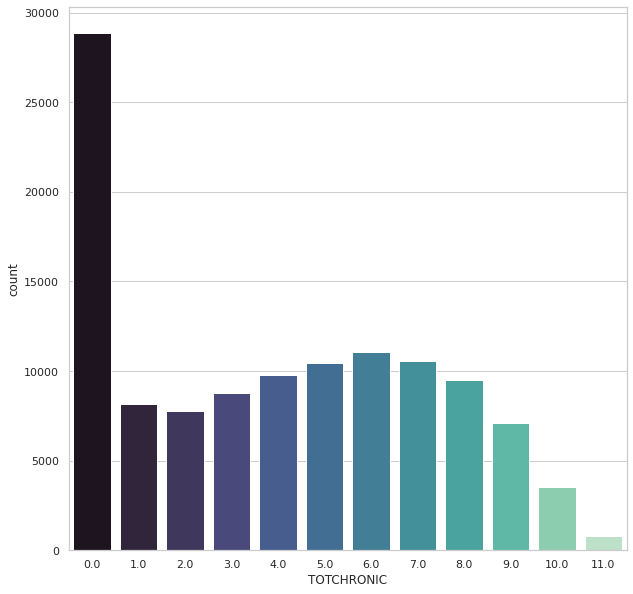

In [25]:
plt.rcParams["figure.figsize"] = (10.0, 10.0)
sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(data=cc_summary_all, x="TOTCHRONIC", palette="mako")

Over the three year period, 25% of the beneficiaries had none of the noted chronic conditions.

7% had 1, 

7% had 2, 

8% had 3, 

8% had 4, 

9% had 5, 

10% had 6,

9% had 7,

8% had 8,

and the remaining 9% had 9 or more.


In [26]:
cc_summary_all["TOTCHRONIC"].value_counts(normalize=True)

0.0     0.248240
6.0     0.095205
7.0     0.090657
5.0     0.089600
4.0     0.084022
8.0     0.081856
3.0     0.075366
1.0     0.070320
2.0     0.066659
9.0     0.061097
10.0    0.030342
11.0    0.006636
Name: TOTCHRONIC, dtype: float64

In [27]:
cc_summary[:2008]["TOTCHRONIC"].value_counts(normalize=True)

0     0.350100
1     0.126992
2     0.119522
3     0.113546
4     0.108068
5     0.066733
6     0.050797
7     0.036355
8     0.016434
9     0.009462
10    0.001494
11    0.000498
Name: TOTCHRONIC, dtype: float64

In [28]:
desynpuf.drop(["SP_ALZHDMTA", "SP_CHF", "SP_CNCR", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", "SP_ESRD",
              "SP_OSTEOPRS", "SP_COPD", "SP_CHRNKIDN", "SP_RA_OA", "SP_STRKETIA", "BENE_SEX_IDENT_CD"], inplace=True, axis=1)

desynpuf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991604 entries, 0 to 991603
Columns: 123 entries, DESYNPUF_ID to B_ESRD
dtypes: datetime64[ns](2), float64(30), int64(21), object(70)
memory usage: 930.5+ MB


## Visits 2008-2010

Total Inpatient Claims: 66,029

Total Outpatient Claims: 776,259

In [29]:
claims_breakdown = desynpuf.groupby(["YEAR", "CLAIM_TYPE"])["CLAIM_TYPE"].count().to_frame()
claims_breakdown.columns = ["COUNT"]
claims_breakdown.head(6)

COUNT
YEAR CLAIM_TYPE        
2008 INPATIENT    27240
     OUTPATIENT  282069
2009 INPATIENT    24873
     OUTPATIENT  320990
2010 INPATIENT    13916
     OUTPATIENT  173200

In [30]:
desynpuf["CLAIM_TYPE"].value_counts()

OUTPATIENT    776259
INPATIENT      66029
Name: CLAIM_TYPE, dtype: int64

As the total number of chronic conditions increases, the total visits increases.

No surprises there!

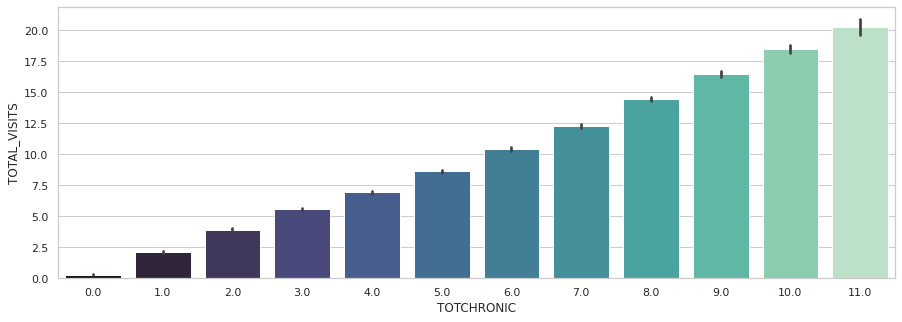

In [31]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid")
sb.barplot(x="TOTCHRONIC", y="TOTAL_VISITS", data=cc_summary_all, palette="mako");

Costs also increased as number of conditions increased, really beginning to take off after 6 chronic conditions.

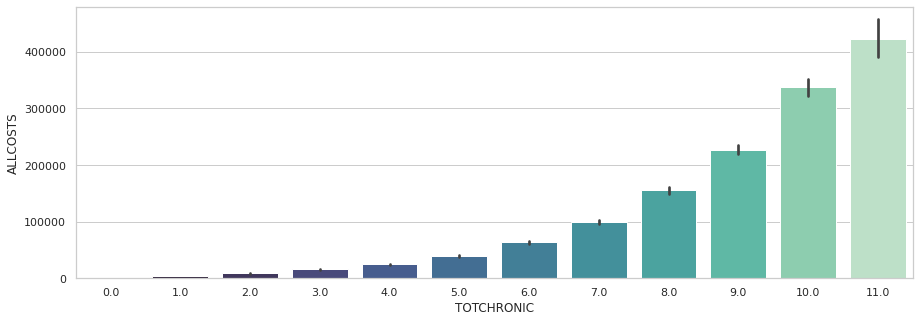

In [32]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid")
sb.barplot(x="TOTCHRONIC", y="ALLCOSTS", data=cc_summary_all, palette="mako");

In [33]:
SUM_TOTAL = cc_summary_all["ALLCOSTS"].sum()
cc_summary_all["PERCENT_COSTS"] = cc_summary_all["ALLCOSTS"] / SUM_TOTAL * 100

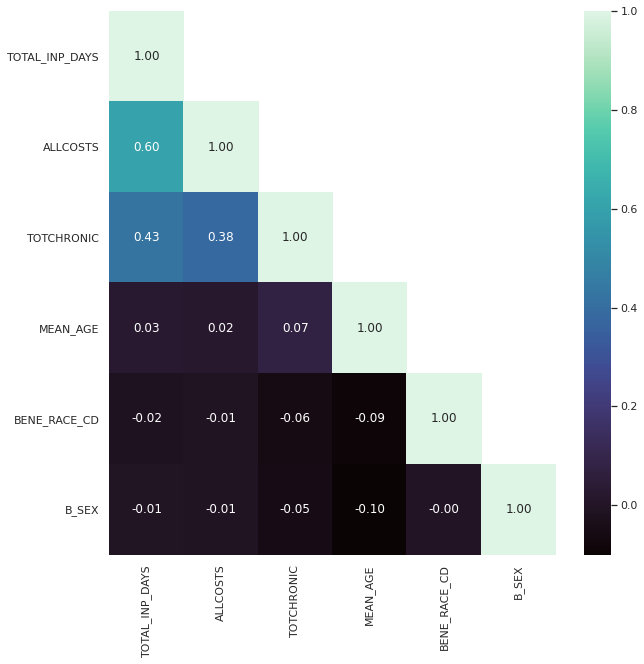

In [34]:
corr_subset = cc_summary_all[["TOTAL_INP_DAYS", "ALLCOSTS", "TOTCHRONIC", "MEAN_AGE", "BENE_RACE_CD", "B_SEX"]]
correlations = corr_subset.corr(method="pearson")
lh_corr = correlations.where(np.tril(np.ones(correlations.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
corr_hmap=sb.heatmap(lh_corr, annot=True, cmap="mako", fmt=".2f")
fig = corr_hmap.get_figure()
fig.savefig("desynpuf_corr1_heatmap.png")

There is a small association between being in a higher age category and the number of chronic conditions.

There is also a (slightly stronger) association between being female, and living to an older age.

There is also an association between being white and living to an older age. :-(

There is a strong correlation between the number of chronic conditions and total number of inpatient days and a very strong correlation between the total number of inpatient days and total costs. Outpatient visits are more numerous, but clearly, inpatient visits are more expensive.

Let's see this by specific condition.

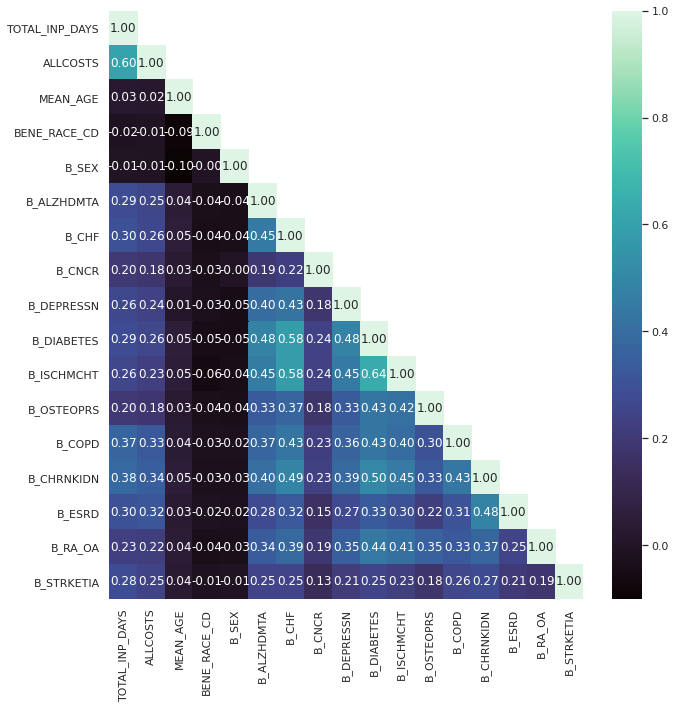

In [35]:
cost_ed_conds = cc_summary_all[["TOTAL_INP_DAYS", "ALLCOSTS", "MEAN_AGE", "BENE_RACE_CD", "B_SEX",
                                "B_ALZHDMTA", "B_CHF", "B_CNCR", "B_DEPRESSN", "B_DIABETES", 
                                "B_ISCHMCHT", "B_OSTEOPRS", "B_COPD", "B_CHRNKIDN", "B_ESRD",
                                "B_RA_OA", "B_STRKETIA"]]
cost_ed_corr = cost_ed_conds.corr(method="pearson")
lr_cost_ed_corr = cost_ed_corr.where(np.tril(np.ones(cost_ed_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
cost_ed_hmap=sb.heatmap(lr_cost_ed_corr, annot=True, cmap="mako", fmt=".2f")
fig = cost_ed_hmap.get_figure()
fig.tight_layout()
fig.savefig("cost_desynpuf_conditions_heatmap.png")

This graph does a great job of showing where all the multicollinearity is between all these variables.

Luckily, it doesn't look like our demographic data has much of an impact here - those correlations with the outcomes are small.

### Most Inpatient Days by Condition

CKD, COPD, ESRD & CHF, Diabetes, Alzheimer's & Stroke, Depression & Ischemic Heart Disease, RA/OA, Osteoporosis & Cancer

### Highest Cost by Condition

CKD, COPD, ESRD, Diabetes & CHF, Alzheimer's, Depression & Stroke, Ischemic Heart Disease, RA/OA, Osteoporosis & Cancer

In [36]:
cc_summary.to_csv("/home/kylier/python/DS/data/PUF/PUF_BENE_SUMMARY_YEARS.csv")

In [37]:
cc_summary_all.to_csv("/home/kylier/python/DS/data/PUF/PUF_BENE_SUMMARY_ALL.csv")

In [38]:
cc_summary_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116339 entries, 0000438E79D01BEA to FFFFF4859B6D7402
Data columns (total 60 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   MEAN_AGE                      86464 non-null   float64
 1   B_SEX                         116339 non-null  int64  
 2   BENE_RACE_CD                  116339 non-null  int64  
 3   B_ALZHDMTA                    116339 non-null  float64
 4   B_CHF                         116339 non-null  float64
 5   B_CNCR                        116339 non-null  float64
 6   B_COPD                        116339 non-null  float64
 7   B_DEPRESSN                    116339 non-null  float64
 8   B_DIABETES                    116339 non-null  float64
 9   B_ISCHMCHT                    116339 non-null  float64
 10  B_OSTEOPRS                    116339 non-null  float64
 11  B_CHRNKIDN                    116339 non-null  float64
 12  B_RA_OA                 

In [39]:
cc_summary3 = cc_summary_all.copy()
cc_summary3.reset_index(inplace=True)
cc_summary3

,DESYNPUF_ID,MEAN_AGE,B_SEX,BENE_RACE_CD,B_ALZHDMTA,B_CHF,B_CNCR,B_COPD,B_DEPRESSN,B_DIABETES,...,FIPS_COUNTY_CODE,TOTIPCOST,MEANIPCOST,TOTOPCOST,MEANOPCOST,ALLCOSTS,MEANCOSTS,TOTCHRONIC,VISITS_FLAG,PERCENT_COSTS
0,0000438E79D01BEA,NaN,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,57.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0,0.000000
1,00010E7BEA69142C,71.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.000000,1620.0,180.000000,1620.0,45.000000,2.0,1,0.000022
2,00015BF6509E1DF7,75.1,0,1,1.0,1.0,0.0,1.0,0.0,1.0,...,119.0,0.0,0.000000,25860.0,2873.333333,25860.0,478.888889,7.0,1,0.000356
3,00018DD17736A661,73.0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,...,101.0,0.0,0.000000,6930.0,330.000000,6930.0,165.000000,2.0,1,0.000095
4,000240D599ED789C,67.0,0,2,1.0,1.0,0.0,0.0,0.0,1.0,...,35.0,461726.0,9190.888889,47330.0,2066.666667,509056.0,4939.888889,6.0,1,0.007014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116334,FFFDFD377BF9EC59,NaN,0,3,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0,0.000000
116335,FFFF1E240FFD97D8,NaN,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0,0.000000
116336,FFFF58406F9882DD,69.0,1,1,0.0,1.0,0.0,1.0,1.0,1.0,...,469.0,0.0,0.000000,1230.0,136.666667,1230.0,22.777778,7.0,1,0.000017
116337,FFFFCA5AFABA1CF6,69.0,1,2,0.0,1.0,0.0,0.0,1.0,1.0,...,59.0,0.0,0.000000,1100.0,183.333333,1100.0,91.666667,6.0,1,0.000015


In [40]:
cc_county = cc_summary3.groupby(["FIPS_STATE_CODE", "FIPS_COUNTY_CODE"]).aggregate({"DESYNPUF_ID":"count",
                                                                                    "VISITS_FLAG":"sum",
                                                                                    "MEAN_AGE":"mean",
                                                                                  "B_SEX":"mean",
                                                                                  "BENE_RACE_CD":"mean",
                                                                                  "B_ALZHDMTA":"sum",
                                                                                  "B_CHF":"sum",
                                                                                  "B_CNCR":"sum",
                                                                                  "B_COPD":"sum",
                                                                                  "B_DEPRESSN":"sum",
                                                                                  "B_DIABETES":"sum",
                                                                                  "B_ISCHMCHT":"sum",
                                                                                  "B_OSTEOPRS":"sum",
                                                                                  "B_CHRNKIDN":"sum",
                                                                                  "B_RA_OA":"sum",
                                                                                  "B_STRKETIA":"sum",
                                                                                  "B_ESRD":"sum",
                                                                                  "MEAN_HI_CVRAGE_TOT_MONS":"mean",
                                                                                  "MEAN_SMI_CVRAGE_TOT_MONS":"mean",
                                                                                  "MEAN_HMO_CVRAGE_TOT_MONS":"mean",
                                                                                  "MEAN_CVRG_MOS_NUM":"mean",
                                                                                  "TOTAL_VISITS":"sum",
                                                                                    "MEAN_TOTAL_VISITS":"mean",
                                                                                  "TOTAL_CLAIMS":"sum",
                                                                                    "MEAN_TOTAL_CLAIMS":"mean",
                                                                                  "MEAN_NUM_PRVDRS":"mean",
                                                                                  "TOT_CLM_PMT_AMT":"sum",
                                                                                    "MEAN_CLM_PMT_AMT":"mean",
                                                                                  "TOT_NCH_PRMRY_PYR_CLM_PD_AMT":"sum",
                                                                                  "MEAN_NUM_AT_PHYSNS":"mean",
                                                                                  "MEAN_NUM_OP_PHYSNS":"mean",
                                                                                  "MEAN_NUM_OT_PHYSNS":"mean",
                                                                                   "TOT_ADMTNG_ICD9_CDS":"sum",
                                                                                   "TOTAL_INP_DAYS":"sum",
                                                                                   "MEAN_INP_STAY":"mean",
                                                                                   "MIN_INP_STAY": "min",
                                                                                   "MAX_INP_STAY": "max",
                                                                                   "TOT_CLM_DRG_CDS":"sum",
                                                                                    "TOT_MEDREIMB_IP":"sum",
                                                                                    "MEAN_MEDREIMB_IP":"mean",
                                                                                  "TOT_BENRES_IP":"sum",
                                                                                    "MEAN_BENRES_IP":"mean",
                                                                                  "TOT_PPPYMT_IP":"sum",
                                                                                    "MEAN_PPPYMT_IP":"mean",
                                                                                  "TOT_MEDREIMB_OP":"sum",
                                                                                    "MEAN_MEDREIMB_OP":"mean",
                                                                                  "TOT_BENRES_OP":"sum",
                                                                                    "MEAN_BENRES_OP":"mean",
                                                                                  "TOT_PPPYMT_OP":"sum",
                                                                                    "MEAN_PPPYMT_OP":"mean",
                                                                                  "CBSA":"mean",
                                                                                  "TOTCHRONIC":["sum","mean"],
                                                                                  "TOTIPCOST":"sum",
                                                                                  "MEANIPCOST":"mean",
                                                                                   "TOTOPCOST":"sum",
                                                                                  "MEANOPCOST":"mean",
                                                                                   "ALLCOSTS":"sum",
                                                                                   "MEANCOSTS":"mean"})


cc_county.columns = ["BENE_COUNT", "BENE_USERS", "MEAN_AGE", "MEAN_SEX", "MEAN_RACE_CD", "ALZHDMTA_CASES", "CHF_CASES", 
                     "CNCR_CASES", "COPD_CASES","DEPRESSN_CASES", "DIABETES_CASES", "ISCHMCHT_CASES", 
                     "OSTEOPRS_CASES", "CHRNKIDN_CASES", "RA_OA_CASES","STRKETIA_CASES", "ESRD_CASES", 
                     "MEAN_HI_CVRAGE_TOT_MONS", "MEAN_SMI_CVRAGE_TOT_MONS","MEAN_HMO_CVRAGE_TOT_MONS", 
                     "MEAN_CVRG_MOS_NUM", "TOTAL_VISITS", "MEAN_TOTAL_VISITS","TOTAL_CLAIMS","MEAN_TOTAL_CLAIMS",
                     "MEAN_NUM_PRVDRS", "TOT_CLM_PMT_AMT", "MEAN_CLM_PMT_AMT", "TOT_NCH_PRMRY_PYR_CLM_PD_AMT",
                     "MEAN_NUM_AT_PHYSNS","MEAN_NUM_OP_PHYSNS","MEAN_NUM_OT_PHYSNS","TOT_ADMTNG_ICD9_CDS",
                     "TOTAL_INP_DAYS", "MEAN_INP_STAY", "MIN_INP_STAY", "MAX_INP_STAY",
                     "TOT_CLM_DRG_CDS", "TOT_MEDREIMB_IP", "MEAN_MEDREIMB_IP", "TOT_BENRES_IP", "MEAN_BENRES_IP",
                      "TOT_PPPYMT_IP", "MEAN_PPPYMT_IP", "TOT_MEDREIMB_OP", "MEAN_MEDREIMB_OP","TOT_BENRES_OP",
                     "MEAN_BENRES_OP","TOT_PPPYMT_OP", "MEAN_PPPYMT_OP","CBSA", "TOTAL_CC_CASES", "MEAN_CC_CASES", 
                     "TOTIPCOST","MEANIPCOST","TOTOPCOST", "MEANOPCOST","ALLCOSTS", "MEANCOSTS"]

C_TOTAL = cc_county["ALLCOSTS"].sum()
cc_county["PERCENT_COSTS"] = cc_county["ALLCOSTS"] / C_TOTAL * 100
cc_county["USE_PROPORTION"] = cc_county["BENE_USERS"]/cc_county["BENE_COUNT"]
cc_county["MEAN_AGE"] = cc_county["MEAN_AGE"].round(decimals=1)

In [41]:
cc_county

BENE_COUNT  BENE_USERS  MEAN_AGE  MEAN_SEX  \
FIPS_STATE_CODE FIPS_COUNTY_CODE                                               
1.0             1.0                       16          13      65.4  0.187500   
                3.0                       95          65      70.3  0.463158   
                5.0                       14          12      72.4  0.642857   
                7.0                       17          12      69.0  0.411765   
                9.0                       22          12      68.8  0.636364   
...                                      ...         ...       ...       ...   
56.0            37.0                      34          17      72.9  0.529412   
                39.0                      13           5      70.5  0.538462   
                41.0                      18           6      72.0  0.500000   
                43.0                       8           0       NaN  0.625000   
                45.0                      15           2      75.5  0.600000   

                                  MEAN_RACE_CD  ALZHDMTA_CASES  CHF_CASES  \
FIPS_STATE_CODE FIPS_COUNTY_CODE                                            
1.0             1.0                   1.312500             7.0       12.0   
                3.0                   1.378947            34.0       46.0   
                5.0                   1.500000             4.0        7.0   
                7.0                   1.294118             7.0        9.0   
                9.0                   1.409091             4.0        6.0   
...                                        ...             ...        ...   
56.0            37.0                  1.000000             8.0       14.0   
                39.0                  1.000000             2.0        3.0   
                41.0                  1.111111             4.0        3.0   
                43.0                  1.000000             0.0        0.0   
                45.0                  1.000000             1.0        1.0   

                                  CNCR_CASES  COPD_CASES  DEPRESSN_CASES  ...  \
FIPS_STATE_CODE FIPS_COUNTY_CODE                                          ...   
1.0             1.0                      3.0         4.0             7.0  ...   
                3.0                     18.0        22.0            33.0  ...   
                5.0                      0.0         2.0             5.0  ...   
                7.0                      2.0         6.0            10.0  ...   
                9.0                      4.0         3.0             4.0  ...   
...                                      ...         ...             ...  ...   
56.0            37.0                     8.0         5.0             7.0  ...   
                39.0                     3.0         0.0             2.0  ...   
                41.0                     2.0         2.0             3.0  ...   
                43.0                     0.0         0.0             0.0  ...   
                45.0                     0.0         1.0             0.0  ...   

                                  TOTAL_CC_CASES  MEAN_CC_CASES  TOTIPCOST  \
FIPS_STATE_CODE FIPS_COUNTY_CODE                                             
1.0             1.0                         79.0       4.937500   534188.0   
                3.0                        356.0       3.747368  5087450.0   
                5.0                         49.0       3.500000   760096.0   
                7.0                         76.0       4.470588   467694.0   
                9.0                         48.0       2.181818   946942.0   
...                                          ...            ...        ...   
56.0            37.0                        87.0       2.558824   945512.0   
                39.0                        23.0       1.769231    30408.0   
                41.0                        29.0       1.611111    45340.0   
                43.0                         0.0       0.000000        0.0   
 

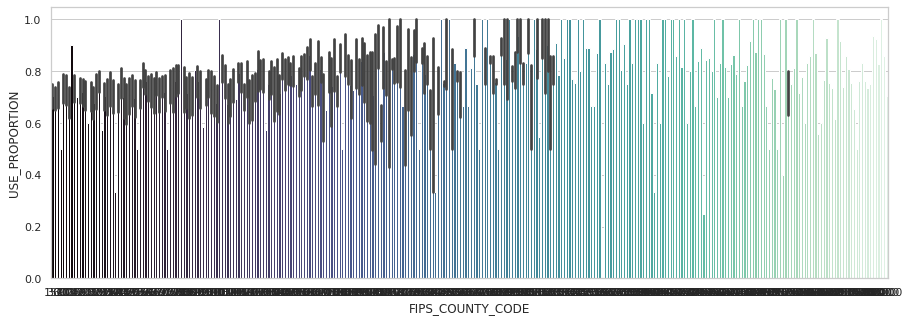

In [42]:
plot_copy = cc_county.reset_index()
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid")
sb.barplot(x="FIPS_COUNTY_CODE", y="USE_PROPORTION", data=plot_copy, palette="mako");

In [43]:
cc_county["BENE_COUNT"].describe()

count    3011.000000
mean       38.037197
std        94.880771
min         1.000000
25%         6.000000
50%        13.000000
75%        32.000000
max      2498.000000
Name: BENE_COUNT, dtype: float64

## Representative Counties

So, if we remove the counties with fewer than 50 beneficiaries, we have 490 counties.

If we remove those with fewer than 30, we have 811 counties.

There are 121 counties with ONE beneficiary.

There are 693 counties with 5 OR FEWER beneficiaries, and 1267 counties with 10 OR FEWER.

In some ways, these smaller counties are interesting.  Do they have so few beneficiaries because they are all very small?  Or, are they places where few people can access care, or where it is culturally normative not to?  Or, perhaps it is completely cost-prohibitive - even Medicare beneficiaries have to pay a premium or copays and while many very poor people would be eligible for Medicaid, in some states they might not be or it might be very difficult to get signed up or they just couldn't travel to the hospital or provider's office.

Let me know what you think would be a good cut-off.

In [44]:
cc_reasonable = cc_county[(cc_county["BENE_COUNT"]>49)]
cc_reasonable.shape

(490, 61)

<AxesSubplot:xlabel='BENE_COUNT', ylabel='Count'>

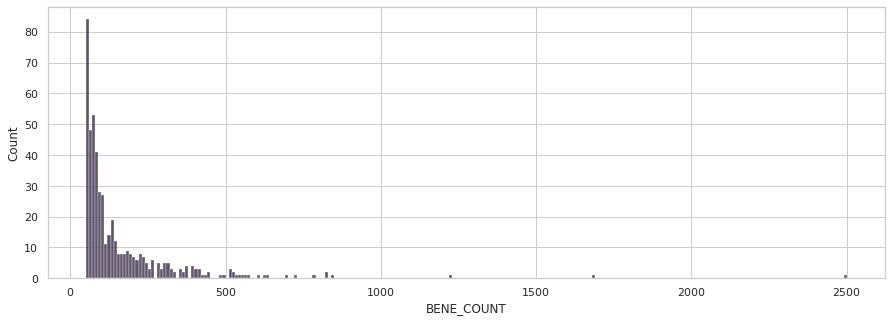

In [45]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="mako")
sb.histplot(x=cc_reasonable["BENE_COUNT"], binwidth=10)

## My State :) 

There are a total of 10 counties in New Hampshire. The state is small, and some counties are sparsely populated.

COOS County (7) is known to be a place where people have poor health and health care access.  Due to the constraint I tried on the # of beneficiaries per county (50), this one dropped off the list.

Only the 5 most populous counties remain.

In [48]:
r = cc_reasonable.reset_index()
r[r["FIPS_STATE_CODE"] == 33]

,FIPS_STATE_CODE,FIPS_COUNTY_CODE,BENE_COUNT,BENE_USERS,MEAN_AGE,MEAN_SEX,MEAN_RACE_CD,ALZHDMTA_CASES,CHF_CASES,CNCR_CASES,...,TOTAL_CC_CASES,MEAN_CC_CASES,TOTIPCOST,MEANIPCOST,TOTOPCOST,MEANOPCOST,ALLCOSTS,MEANCOSTS,PERCENT_COSTS,USE_PROPORTION
242,33.0,9.0,56,42,68.5,0.410714,1.089286,16.0,27.0,9.0,...,219.0,3.910714,1347266.0,617.706349,412150.0,489.464286,1759416.0,390.743056,0.024434,0.750000
243,33.0,11.0,167,120,72.0,0.449102,1.005988,69.0,83.0,20.0,...,629.0,3.766467,4722608.0,542.347305,2705830.0,712.395210,7428438.0,391.386560,0.103164,0.718563
244,33.0,13.0,69,51,75.0,0.579710,1.014493,32.0,33.0,16.0,...,268.0,3.884058,2521050.0,511.017713,1340120.0,797.729469,3861170.0,390.847021,0.053623,0.739130
245,33.0,15.0,128,89,73.7,0.445312,1.031250,53.0,59.0,8.0,...,478.0,3.734375,2744210.0,527.986111,1234680.0,534.739583,3978890.0,353.116319,0.055258,0.695312
246,33.0,17.0,58,42,71.8,0.568966,1.068966,20.0,33.0,10.0,...,239.0,4.120690,2291728.0,810.394636,921030.0,736.551724,3212758.0,527.955939,0.044618,0.724138


In [49]:
r = cc_county.reset_index()
r[r["FIPS_STATE_CODE"] == 33]

,FIPS_STATE_CODE,FIPS_COUNTY_CODE,BENE_COUNT,BENE_USERS,MEAN_AGE,MEAN_SEX,MEAN_RACE_CD,ALZHDMTA_CASES,CHF_CASES,CNCR_CASES,...,TOTAL_CC_CASES,MEAN_CC_CASES,TOTIPCOST,MEANIPCOST,TOTOPCOST,MEANOPCOST,ALLCOSTS,MEANCOSTS,PERCENT_COSTS,USE_PROPORTION
1685,33.0,1.0,47,36,72.7,0.446809,1.000000,21.0,23.0,8.0,...,204.0,4.340426,1916552.0,576.482270,1220230.0,1015.319149,3136782.0,461.550827,0.043563,0.765957
1686,33.0,3.0,31,22,71.6,0.612903,1.032258,12.0,15.0,6.0,...,117.0,3.774194,1148632.0,719.784946,366640.0,580.752688,1515272.0,456.684588,0.021044,0.709677
1687,33.0,5.0,41,32,71.9,0.634146,1.000000,11.0,23.0,5.0,...,168.0,4.097561,1248592.0,621.653117,531940.0,656.585366,1780532.0,420.257453,0.024728,0.780488
1688,33.0,7.0,27,22,73.6,0.481481,1.111111,12.0,17.0,4.0,...,108.0,4.000000,410116.0,300.230453,259140.0,631.604938,669256.0,255.382716,0.009294,0.814815
1689,33.0,9.0,56,42,68.5,0.410714,1.089286,16.0,27.0,9.0,...,219.0,3.910714,1347266.0,617.706349,412150.0,489.464286,1759416.0,390.743056,0.024434,0.750000
1690,33.0,11.0,167,120,72.0,0.449102,1.005988,69.0,83.0,20.0,...,629.0,3.766467,4722608.0,542.347305,2705830.0,712.395210,7428438.0,391.386560,0.103164,0.718563
1691,33.0,13.0,69,51,75.0,0.579710,1.014493,32.0,33.0,16.0,...,268.0,3.884058,2521050.0,511.017713,1340120.0,797.729469,3861170.0,390.847021,0.053623,0.739130
1692,33.0,15.0,128,89,73.7,0.445312,1.031250,53.0,59.0,8.0,...,478.0,3.734375,2744210.0,527.986111,1234680.0,534.739583,3978890.0,353.116319,0.055258,0.695312
1693,33.0,17.0,58,42,71.8,0.568966,1.068966,20.0,33.0,10.0,...,239.0,4.120690,2291728.0,810.394636,921030.0,736.551724,3212758.0,527.955939,0.044618,0.724138
1694,33.0,19.0,20,14,72.9,0.350000,1.000000,3.0,8.0,0.0,...,49.0,2.450000,133718.0,296.544444,265790.0,736.833333,399508.0,275.855556,0.005548,0.700000


In [53]:
cc_county.to_csv("/home/kylier/python/DS/data/PUF/PUF_COUNTY_SUMMARY.csv")

In [54]:
cc_reasonable.to_csv("/home/kylier/python/DS/data/PUF/PUF_COUNTY_SUMMARY_50.csv")